# Unsupervised learning for Iris Species

# Content

* Data
    * Iris Species
    * Libraries
    * Data Reading
    * Data Analysis
* Unsupervised Learning
    * K-Means Clustering
    * Hierarchical Clustring
    * Clustering
* Cluster Success


# Data

## Iris Species

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

Id
SepalLengthCm
SepalWidthCm
PetalLengthCm
PetalWidthCm
Species

https://www.kaggle.com/uciml/iris

![](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

## Libraries

In [822]:
# Mathematics
import numpy as np
import pandas as pd 

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/iris/database.sqlite
/kaggle/input/iris/Iris.csv


## Data Reading

In [796]:
data = pd.read_csv("../input/iris/Iris.csv")

## Data Analysis

In [797]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [798]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [799]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [800]:
data2 = data.drop('Species',axis = 1)
data2

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [801]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [802]:
data2.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


# Unsupervised Learning

## K-Means Clustring

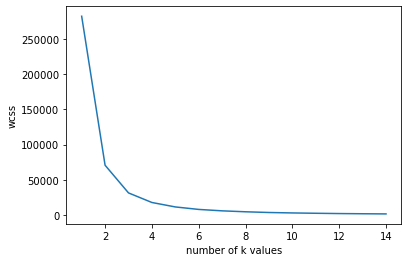

In [803]:
from sklearn.cluster import KMeans

wcss = []


for k in range(1,15):
    
    Kmeans = KMeans(n_clusters=k)
    Kmeans.fit(data2)
    wcss.append(Kmeans.inertia_)
    
    
plt.plot(range(1,15),wcss)
plt.xlabel("number of k values")
plt.ylabel("wcss")
plt.show()

In [804]:
# k=3 için model

kmeans2 = KMeans(n_clusters = 3)
clusters = kmeans2.fit_predict(data2)
data2["label"]= clusters

In [805]:
data2

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,label
0,1,5.1,3.5,1.4,0.2,2
1,2,4.9,3.0,1.4,0.2,2
2,3,4.7,3.2,1.3,0.2,2
3,4,4.6,3.1,1.5,0.2,2
4,5,5.0,3.6,1.4,0.2,2
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,1
146,147,6.3,2.5,5.0,1.9,1
147,148,6.5,3.0,5.2,2.0,1
148,149,6.2,3.4,5.4,2.3,1


In [806]:
data2["label"].unique()

array([2, 0, 1], dtype=int32)

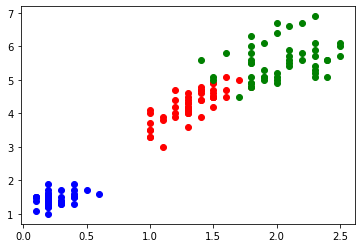

In [807]:
plt.scatter(data2.PetalWidthCm[data2.label==0],data2.PetalLengthCm[data2.label==0], color="red")
plt.scatter(data2.PetalWidthCm[data2.label==1],data2.PetalLengthCm[data2.label==1], color="green")
plt.scatter(data2.PetalWidthCm[data2.label==2],data2.PetalLengthCm[data2.label==2], color="blue")

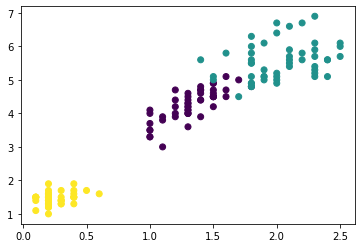

In [808]:
plt.scatter(x="PetalWidthCm",y="PetalLengthCm",c="label", data=data2)
plt.show()

## Hierarchical Clustring

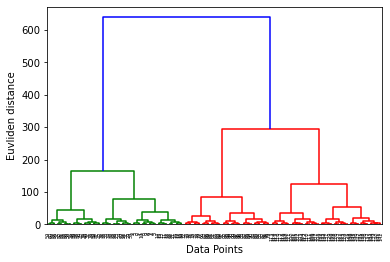

In [809]:
from scipy.cluster.hierarchy import linkage,dendrogram

merg = linkage(data2,method="ward")
dendrogram(merg,leaf_rotation=90)

plt.xlabel("Data Points")
plt.ylabel("Euvliden distance")
plt.show()

## Clustering

In [810]:
from sklearn.cluster import AgglomerativeClustering

h_c = AgglomerativeClustering(n_clusters=3,linkage="ward")

cluster = h_c.fit_predict(data2)

data2["label"] = cluster

In [811]:
data2["label"].unique()

array([0, 2, 1])

In [812]:
kmeans2.cluster_centers_[:,4] # x_centers

array([1.326, 2.026, 0.244])

In [813]:
kmeans2.cluster_centers_[:,3] # y_centers

array([4.26 , 5.552, 1.464])

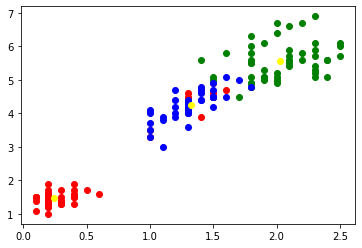

In [814]:
plt.scatter(data2.PetalWidthCm[data2.label==0],data2.PetalLengthCm[data2.label==0], color="red")
plt.scatter(data2.PetalWidthCm[data2.label==1],data2.PetalLengthCm[data2.label==1], color="green")
plt.scatter(data2.PetalWidthCm[data2.label==2],data2.PetalLengthCm[data2.label==2], color="blue")
plt.scatter(kmeans2.cluster_centers_[:,4],kmeans2.cluster_centers_[:,3], color="yellow")
plt.show()

# Cluster Success


In [815]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [816]:
Species_Values = []

for each in data.Species:
    
    if (each == "Iris-setosa"):
        Species_Values.append(0)
        
    elif(each == "Iris-versicolor"):
        Species_Values.append(2)
        
    else:
        Species_Values.append(1)

data["Species"] = Species_Values
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [817]:
data["Guess"] = cluster
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Guess
0,1,5.1,3.5,1.4,0.2,0,0
1,2,4.9,3.0,1.4,0.2,0,0
2,3,4.7,3.2,1.3,0.2,0,0
3,4,4.6,3.1,1.5,0.2,0,0
4,5,5.0,3.6,1.4,0.2,0,0


In [819]:
p = data.shape[0]
Success = []
for i in np.arange(p):
    
    if( data.loc[i,"Species"] == data.loc[i,"Guess"]):
        Success.append(1)
    else:
        Success.append(0)
    
data["Success"] = Success
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Guess,Success
0,1,5.1,3.5,1.4,0.2,0,0,1
1,2,4.9,3.0,1.4,0.2,0,0,1
2,3,4.7,3.2,1.3,0.2,0,0,1
3,4,4.6,3.1,1.5,0.2,0,0,1
4,5,5.0,3.6,1.4,0.2,0,0,1
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,1,1,1
146,147,6.3,2.5,5.0,1.9,1,1,1
147,148,6.5,3.0,5.2,2.0,1,1,1
148,149,6.2,3.4,5.4,2.3,1,1,1


In [820]:
# data.shape[0] : 150
print("Cluster Success : {}".format(data["Success"].sum()/data.shape[0]))

Cluster Success : 0.9266666666666666
